In [1]:

import pandas as pd
from sqlalchemy import create_engine

# Database connection string is omitted for security reasons
engine = create_engine(
    "postgresql+psycopg2://<user>:<password>@<host>:<port>/<database>"
)

# čitanje view-a koji spaja više tabela (orders + returns + users)
df = pd.read_sql("SELECT * FROM public.vw_orders_full_new", engine)

df


,row_id,order_priority,discount,unit_price,shipping_cost,customer_id,customer_name,ship_mode,customer_segment,product_category,...,postal_code,order_date,ship_date,profit,quantity_ordered_new,sales,order_id,order_pk,return_status,manager
0,21097,High,0.08,125.99,7.69,2973,Sally Liu,Regular Air,Home Office,Technology,...,53151,2015-04-13,2015-04-15,1269.38,23,2424.68,87186,207,None,Chris
1,21638,High,0.09,77.51,4.00,1957,Ted Crowder,Regular Air,Consumer,Technology,...,63130,2015-04-07,2015-04-09,-387.10,1,77.47,89818,1020,None,Chris
2,23926,Medium,0.06,3.95,2.00,1254,Anne Bland,Regular Air,Home Office,Office Supplies,...,77530,2015-03-24,2015-03-25,-9.68,5,19.66,89984,1364,None,Chris
3,22119,High,0.09,270.97,28.06,1136,Carmen McPherson,Delivery Truck,Consumer,Technology,...,60188,2015-01-02,2015-01-04,2660.14,15,3855.28,87940,1,Returned,Chris
4,24775,Not Specified,0.00,80.98,35.00,868,Sharon Ellis,Regular Air,Corporate,Office Supplies,...,55126,2015-02-25,2015-02-27,-684.78,8,682.79,91194,2,None,Chris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,20039,High,0.06,89.83,35.00,3279,Ricky Allred,Regular Air,Home Office,Office Supplies,...,29203,2015-04-06,2015-04-08,31.11,4,366.26,90766,1348,None,Sam
1947,22275,Low,0.02,419.19,19.99,2593,Anne Schultz,Regular Air,Corporate,Office Supplies,...,30605,2015-04-17,2015-04-17,-39.61,10,4354.55,87772,1349,Returned,Sam
1948,26141,High,0.05,19.23,6.15,3284,Michael Shaffer,Express Air,Corporate,Furniture,...,34741,2015-02-20,2015-02-22,-2133.28,6,119.78,90751,1353,None,Sam
1949,26362,Low,0.07,400.97,48.26,2258,Nicole Pope,Delivery Truck,Corporate,Technology,...,27801,2015-03-09,2015-03-13,45.13,8,2961.32,87962,1355,None,Sam


In [2]:
total_rows = len(df)
percent_of_nulls = (df.isna().sum()/total_rows) * 100
percent_of_nulls 

row_id                   0.000000
order_priority           0.000000
discount                 0.000000
unit_price               0.000000
shipping_cost            0.000000
customer_id              0.000000
customer_name            0.000000
ship_mode                0.000000
customer_segment         0.000000
product_category         0.000000
product_sub_category     0.000000
product_container        0.000000
product_name             0.000000
product_base_margin      0.820092
country                  0.000000
region                   0.000000
state_or_province        0.000000
city                     0.000000
postal_code              0.000000
order_date               0.000000
ship_date                0.000000
profit                   0.000000
quantity_ordered_new     0.000000
sales                    0.000000
order_id                 0.000000
order_pk                 0.000000
return_status           77.703742
manager                  0.000000
dtype: float64

In [3]:
# koliko redova je sadrzalo null
rows_with_nulls = df.isna().any(axis=1).sum()
rows_with_nulls


np.int64(1521)

In [4]:
#zamena vrednosti null sa median
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[numeric_cols]

,row_id,discount,unit_price,shipping_cost,customer_id,product_base_margin,profit,quantity_ordered_new,sales,order_id,order_pk
0,21097,0.08,125.99,7.69,2973,0.58,1269.38,23,2424.68,87186,207
1,21638,0.09,77.51,4.00,1957,0.76,-387.10,1,77.47,89818,1020
2,23926,0.06,3.95,2.00,1254,0.53,-9.68,5,19.66,89984,1364
3,22119,0.09,270.97,28.06,1136,0.56,2660.14,15,3855.28,87940,1
4,24775,0.00,80.98,35.00,868,0.83,-684.78,8,682.79,91194,2
...,...,...,...,...,...,...,...,...,...,...,...
1946,20039,0.06,89.83,35.00,3279,0.83,31.11,4,366.26,90766,1348
1947,22275,0.02,419.19,19.99,2593,0.58,-39.61,10,4354.55,87772,1349
1948,26141,0.05,19.23,6.15,3284,0.44,-2133.28,6,119.78,90751,1353
1949,26362,0.07,400.97,48.26,2258,0.36,45.13,8,2961.32,87962,1355


In [5]:
#dodaj kolonu koja ce izracunati koliko ima dana izmedju order_date i ship_date
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

df["days_between_order_and_ship"] = (df["ship_date"] - df["order_date"]).dt.days
df["days_between_order_and_ship"]

0       2
1       2
2       1
3       2
4       2
       ..
1946    2
1947    0
1948    2
1949    4
1950    4
Name: days_between_order_and_ship, Length: 1951, dtype: int64

In [6]:
# formatiraj postal kod 5 cifata
df["postal_code"] = df["postal_code"].astype(str).str.zfill(5)
df["postal_code"]

0       53151
1       63130
2       77530
3       60188
4       55126
        ...  
1946    29203
1947    30605
1948    34741
1949    27801
1950    27801
Name: postal_code, Length: 1951, dtype: object

In [7]:
#  izbaciti ID kolone
df_corr = df.drop(
    columns=["row_id", "customer_id", "order_id", "order_pk"],
    errors="ignore"
)

#  uzimamo samo numericke
df_corr = df_corr.select_dtypes(include="number")


# korelacija
corr = df_corr.corr()

#  pretvaramo u parove
pairs = corr.unstack().reset_index()
pairs.columns = ["feature_1", "feature_2", "correlation"]

# izbaci kolonu sa samom sobom
pairs = pairs[pairs["feature_1"] != pairs["feature_2"]]

# apsolutne vrednosti korelacije
pairs["abs_corr"] = pairs["correlation"].abs()

# sortiraj i ukloni duplikate
pairs = pairs.sort_values("abs_corr", ascending=False)
pairs = pairs.drop_duplicates(subset="abs_corr")


# prva 3 i poslednja 3
top_3_most = pairs.head(3)
top_3_least = pairs.tail(3)

result = pd.concat([top_3_most, top_3_least])

result 



,feature_1,feature_2,correlation,abs_corr
14,unit_price,sales,0.443562,0.443562
38,profit,sales,0.364403,0.364403
19,shipping_cost,product_base_margin,0.358983,0.358983
20,shipping_cost,profit,0.002158,0.002158
57,days_between_order_and_ship,unit_price,-0.001773,0.001773
31,product_base_margin,days_between_order_and_ship,-0.000886,0.000886


In [8]:
#3 najvece korelacije parova
top_3_most

,feature_1,feature_2,correlation,abs_corr
14,unit_price,sales,0.443562,0.443562
38,profit,sales,0.364403,0.364403
19,shipping_cost,product_base_margin,0.358983,0.358983


In [9]:
#3 najmanje korelacije parova
top_3_least

,feature_1,feature_2,correlation,abs_corr
20,shipping_cost,profit,0.002158,0.002158
57,days_between_order_and_ship,unit_price,-0.001773,0.001773
31,product_base_margin,days_between_order_and_ship,-0.000886,0.000886


In [10]:
# exportuj u csv
result.to_csv(r"C:\Users\stefan.radovic\Contacts\Desktop\Python Korelacija\correlation_results.csv", index=False)



In [11]:
top_10_customers = (df.groupby (["customer_id", "customer_name"], as_index = False)["sales"].sum().sort_values("sales", ascending = False).head(10))
top_10_customers["sales"] = top_10_customers["sales"].round(2)

top_10_customers

,customer_id,customer_name,sales
169,553,Kristine Connolly,50475.31
563,1733,Nina Horne Kelly,48295.12
151,491,Toni Swanson,32194.12
847,2571,Rosemary O'Brien,29916.01
879,2670,Yvonne Mann,28779.13
387,1185,Lee Xu,20640.35
343,1044,Erin Ballard,20565.99
996,3011,Tammy Raynor,18642.71
202,640,Neal Wolfe,17390.24
1015,3079,Andrew Levine,16792.21


In [12]:
top_10_customers.to_csv(r"C:\Users\stefan.radovic\Contacts\Desktop\Python Korelacija\most valuable customers.csv", index=False)

In [13]:
#pravljenje pivot tabele order priority
pivot_order_priority = df.pivot_table(
    values={
        "discount": "mean",
        "shipping_cost": "mean",
        "days_between_order_and_ship": "mean",
        "profit": "sum",
        "sales": "sum"
    },
    index="order_priority"
).reset_index()


In [14]:
#preimenovanje pivot tabele order priority
pivot_order_priority = pivot_order_priority.rename(columns={
    "discount": "avg_discount",
    "shipping_cost": "avg_shipping_cost",
    "days_between_order_and_ship": "avg_days_between_order_and_ship",
    "profit": "total_profit",
    "sales": "total_sales"
})

In [15]:
pivot_order_priority = pivot_order_priority.round(2)
pivot_order_priority

,order_priority,avg_days_between_order_and_ship,avg_discount,total_profit,total_sales,avg_shipping_cost
0,Critical,1.41,0.05,98.19,1131.82,13.10
1,High,1.35,0.05,93.35,793.08,13.32
2,Low,4.05,0.05,88.98,952.58,13.83
3,Medium,1.41,0.05,115.35,984.25,12.69
4,Not Specified,1.42,0.05,178.00,1060.67,11.90


In [16]:
pivot_order_priority.to_csv(
    r"C:\Users\stefan.radovic\Contacts\Desktop\python pivot tabele\pivot_order_priority.csv",
    index=False
)



In [17]:
#pravljenje pivot tabele customer segment
pivot_customer_segment = df.pivot_table(
    values={
        "discount": "mean",
        "shipping_cost": "mean",
        "days_between_order_and_ship": "mean",
        "profit": "sum",
        "sales": "sum"
    },
    index="customer_segment"
).reset_index()


In [18]:
#preimenovanje pivot tabele customer segment
pivot_customer_segment = pivot_customer_segment.rename(columns={
    "discount": "avg_discount",
    "shipping_cost": "avg_shipping_cost",
    "days_between_order_and_ship": "avg_days_between_order_and_ship",
    "profit": "total_profit",
    "sales": "total_sales"
})

In [19]:
pivot_customer_segment = pivot_customer_segment.round(2)
pivot_customer_segment

,customer_segment,avg_days_between_order_and_ship,avg_discount,total_profit,total_sales,avg_shipping_cost
0,Consumer,1.94,0.05,121.96,973.54,12.12
1,Corporate,1.86,0.05,79.60,961.67,12.94
2,Home Office,2.04,0.05,115.82,988.26,12.43
3,Small Business,1.96,0.05,168.31,1031.69,14.58


In [20]:
pivot_customer_segment.to_csv(
    r"C:\Users\stefan.radovic\Contacts\Desktop\python pivot tabele\pivot_customer_segment.csv",
    index=False
)



In [21]:
#pravljenje pivot tabele product category
pivot_product_category = df.pivot_table(
    values={
        "discount": "mean",
        "shipping_cost": "mean",
        "days_between_order_and_ship": "mean",
        "profit": "sum",
        "sales": "sum"
    },
    index="product_category"
).reset_index()


In [22]:
#preimenovanje pivot tabele product category
pivot_product_category = pivot_product_category.rename(columns={
    "discount": "avg_discount",
    "shipping_cost": "avg_shipping_cost",
    "days_between_order_and_ship": "avg_days_between_order_and_ship",
    "profit": "total_profit",
    "sales": "total_sales"
})

In [23]:
pivot_product_category =pivot_product_category.round(2)
pivot_product_category

,product_category,avg_days_between_order_and_ship,avg_discount,total_profit,total_sales,avg_shipping_cost
0,Furniture,1.90,0.05,148.12,1651.76,30.80
1,Office Supplies,1.96,0.05,83.59,514.82,7.89
2,Technology,1.95,0.05,156.86,1476.38,9.46


In [24]:
pivot_product_category.to_csv(
    r"C:\Users\stefan.radovic\Contacts\Desktop\python pivot tabele\pivot_product_category.csv",
    index=False
)



In [25]:
#pravljenje pivot tabele product sub category
pivot_product_sub_category = df.pivot_table(
    values={
        "discount": "mean",
        "shipping_cost": "mean",
        "days_between_order_and_ship": "mean",
        "profit": "sum",
        "sales": "sum"
    },
    index="product_sub_category"
).reset_index()

In [26]:
#preimenovanje pivot tabele product sub category
pivot_product_sub_category = pivot_product_sub_category.rename(columns={
    "discount": "avg_discount",
    "shipping_cost": "avg_shipping_cost",
    "days_between_order_and_ship": "avg_days_between_order_and_ship",
    "profit": "total_profit",
    "sales": "total_sales"
})

In [27]:
pivot_product_sub_category = pivot_product_sub_category.round(2)
pivot_product_sub_category.head()

,product_sub_category,avg_days_between_order_and_ship,avg_discount,total_profit,total_sales,avg_shipping_cost
0,Appliances,2.14,0.05,125.95,822.01,15.90
1,Binders and Binder Accessories,1.93,0.05,296.48,929.64,7.47
2,Bookcases,2.19,0.05,-21.64,2506.89,45.53
3,Chairs & Chairmats,1.97,0.05,529.30,2837.75,40.45
4,Computer Peripherals,1.88,0.05,9.74,535.61,6.30


In [28]:
pivot_product_sub_category.to_csv(
    r"C:\Users\stefan.radovic\Contacts\Desktop\python pivot tabele\pivot_product_sub_category.csv",
    index=False
)



In [29]:
#pravljenje pivot tabele state or province
pivot_state_or_province = df.pivot_table(
    values={
        "discount": "mean",
        "shipping_cost": "mean",
        "days_between_order_and_ship": "mean",
        "profit": "sum",
        "sales": "sum"
    },
    index="state_or_province"
).reset_index()

In [30]:
#preimenovanje pivot tabele state or province
pivot_state_or_province = pivot_state_or_province.rename(columns={
    "discount": "avg_discount",
    "shipping_cost": "avg_shipping_cost",
    "days_between_order_and_ship": "avg_days_between_order_and_ship",
    "profit": "total_profit",
    "sales": "total_sales"
})

In [31]:
pivot_state_or_province = pivot_state_or_province.round(2)
pivot_state_or_province.head()

,state_or_province,avg_days_between_order_and_ship,avg_discount,total_profit,total_sales,avg_shipping_cost
0,Alabama,2.41,0.05,-109.91,2128.48,16.14
1,Arizona,3.10,0.05,126.12,463.48,15.16
2,Arkansas,1.68,0.05,-53.85,532.93,8.86
3,California,1.83,0.05,174.87,1347.25,12.72
4,Colorado,1.98,0.04,158.31,1041.90,14.30


In [32]:
pivot_state_or_province.to_csv(
    r"C:\Users\stefan.radovic\Contacts\Desktop\python pivot tabele\pivot_state_or_province.csv",
    index=False
)



In [33]:
#uni

In [34]:
numeric_cols = [
    'sales',
    'profit',
    'discount',
    'shipping_cost',
    'unit_price',
    'product_base_margin',
    'quantity_ordered_new'
]

In [35]:
categorical_cols = [
    'region',
    'customer_segment',
    'product_category',
    'product_sub_category',
    'ship_mode',
    'order_priority',
    'return_status',
    'manager'
]

In [36]:
date_cols = ['order_date', 'ship_date']

In [37]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,1951.0,984.488585,2559.871349,2.25,58.805,202.38,800.845,45737.33
profit,1951.0,114.846412,1141.402594,-16476.84,-84.535,1.34,116.305,9228.23
discount,1951.0,0.048975,0.031386,0.00,0.020,0.05,0.080,0.21
shipping_cost,1951.0,12.971978,17.418275,0.49,3.200,6.15,14.365,164.73
unit_price,1951.0,109.053127,393.580491,1.14,6.480,20.99,100.970,6783.02
product_base_margin,1951.0,0.515320,0.136532,0.35,0.380,0.53,0.590,0.85
quantity_ordered_new,1951.0,12.939518,13.873252,1.00,5.000,10.00,16.000,167.00


In [38]:
# sales i profit imaju mnogo manji prosek od maksimuma sto znaci da je vecina porudzbina mala/srednja ali postoji mali broj ogromnih sa ekstremnim iznosima

In [39]:
df[numeric_cols].skew()


sales                    8.559383
profit                  -2.612644
discount                 0.146102
shipping_cost            2.734145
unit_price              12.136687
product_base_margin      0.551542
quantity_ordered_new     3.684905
dtype: float64

In [40]:
# sales ima pozitivni skewness - vecina porudzbina ima umerenene vrednosti prodaje, sa par pozitivno ekstremnih, a profit ima negativan skewness sto znaci da je mali broj ekstremno negativan

In [41]:
df[numeric_cols].kurtosis()

sales                   112.910547
profit                   67.708612
discount                 -0.790305
shipping_cost            10.075358
unit_price              182.309800
product_base_margin      -0.666534
quantity_ordered_new     22.885455
dtype: float64

In [42]:
# kurtosis - debljina repova - znaci da postoje ekstremene vrednosti prodaje (kada pogledamo zajedno sa skewness) i ekstremni gubiti (kada pogledamo zajedno sa skewness)

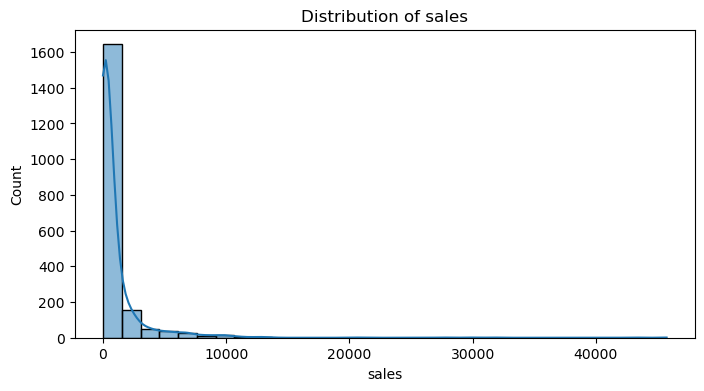

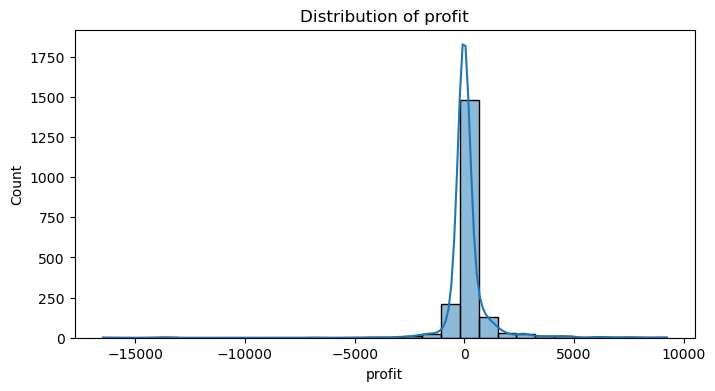

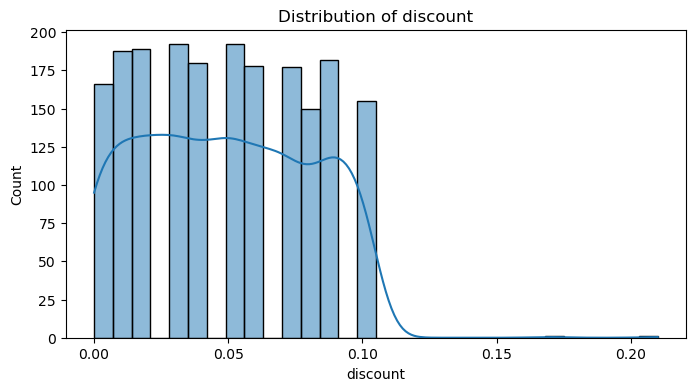

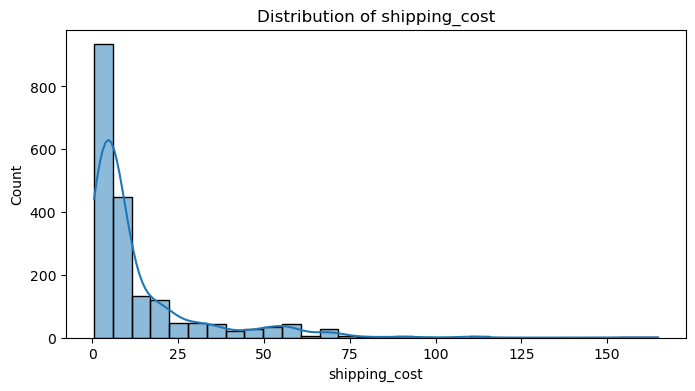

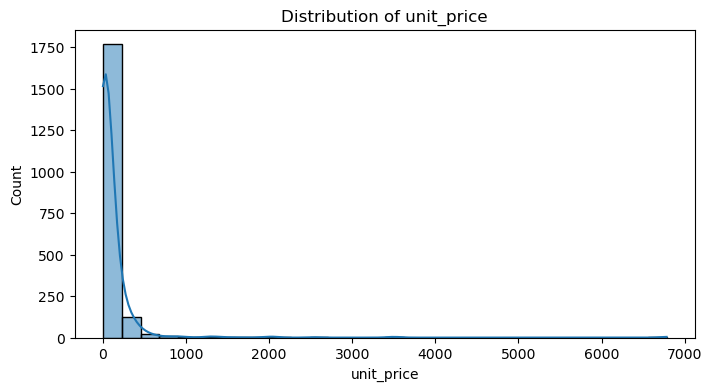

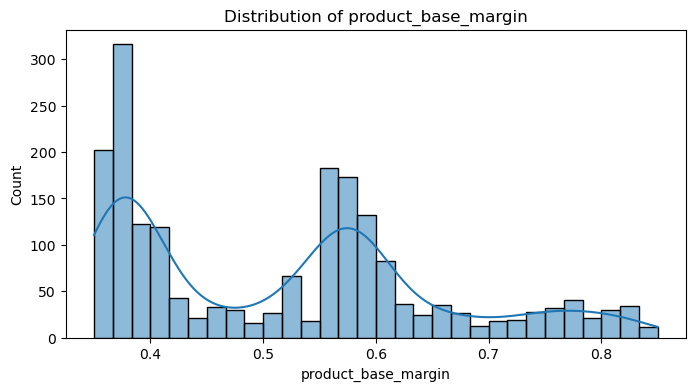

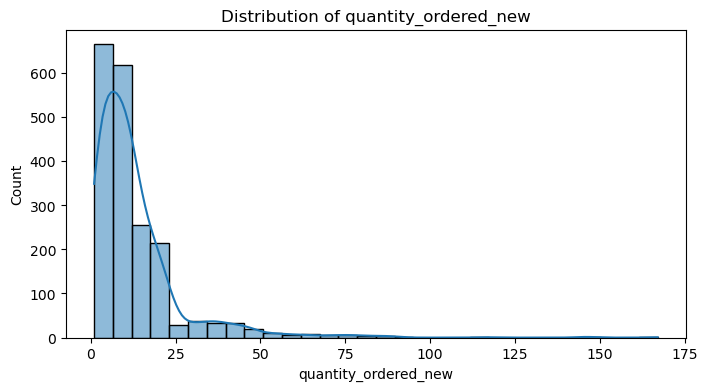

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    data = df[col].dropna()
    
    if data.nunique() < 5:
        print(f"Preskačem {col} (premalo različitih vrednosti)")
        continue
    
    plt.figure(figsize=(8,4))
    sns.histplot(data, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [44]:
# vecina pojedianncih porudzbina ima mali iznos
# vecinski profit je pozitivan i nizi iznos
# osnovna marza proizovda ukazuje na segmentaciju prozivoda po profitu 

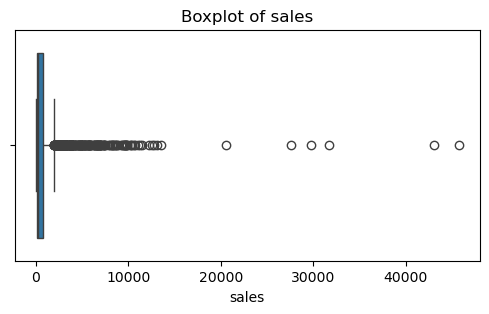

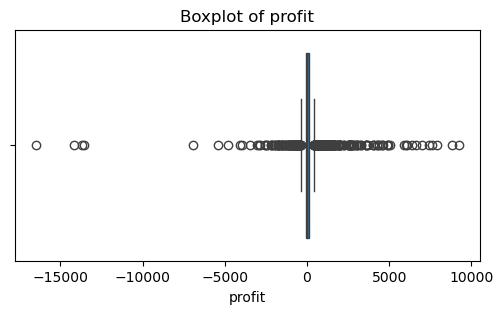

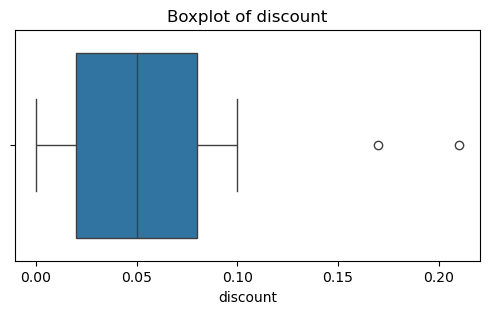

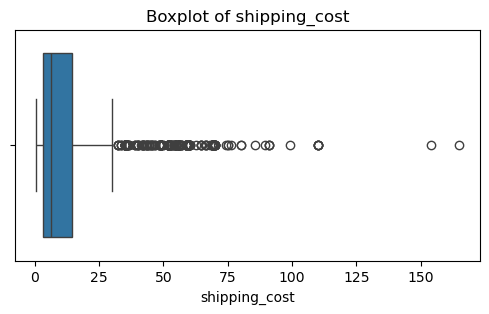

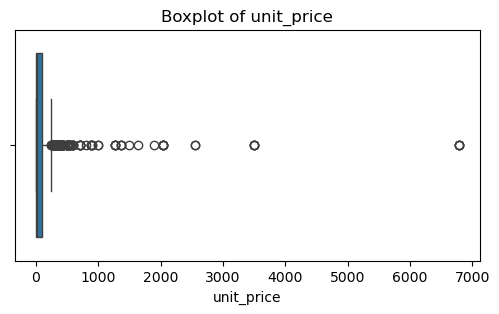

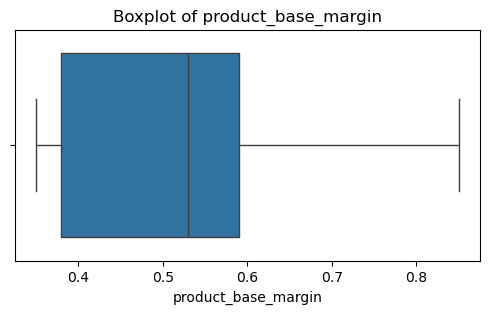

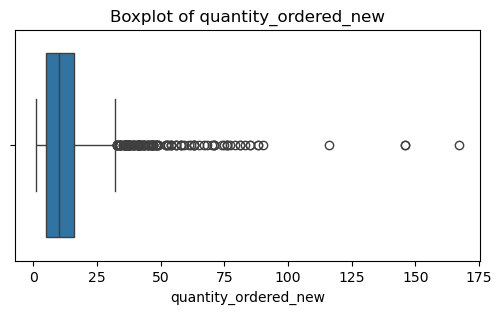

In [45]:
for col in numeric_cols:
    data = df[col].dropna()
    
    if data.nunique() < 5:
        continue
    
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [46]:
# sales - vecina narudzbina ima mali iznos prodaje, ali postoji manji broj ekstremno velikih prodaja
# profit - vecina profita je bliza nuli ali postoji ekstremni profit i pogotovo ekstremni gubici , to ukazu da mali broj narduzbina nosi nesrazmereno veliki rizik ili dobitak
# vecina popusta je manja i skoncentrisana, ali povremeno se javljaju ekstremno visoki popusti koji mozda mogu biti povezani sa outlinerima u profitu
# vecina troskova isporuke nize ali pojestoje i ekstremno veliki troskovi
# vecina prozivoda ima nisku cenu do srednju, dok mali broj prroizvoda ima ekstremno visoku cenu
# osnovna marza proizovda ukazuje da je profitablinost proizvoda po jedinici ne razlikuje drasticno
# vecina poruzbina sadrzi mali broj komada,dok manji deo poruzbina ima ekstremne velicine sto moze biti povezano sa vrednostima prodaje i profitom/gubitkom

In [47]:
import numpy as np

for col in numeric_cols:
    print("\n" + "="*70)
    print(f"OUTLINERI ZA KOLONU (3 STD): {col.upper()}")
    print("="*70)

    series = df[col].dropna()
    mean = series.mean()
    std = series.std()

    lower = mean - 3*std
    upper = mean + 3*std

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    if outliers.empty:
        print("Nema outlinera po 3σ metodi.\n")
    else:
        cols_to_show = list(dict.fromkeys([
            "order_date",
            col,
            "sales",
            "profit",
            "unit_price",
            "shipping_cost",
            "quantity_ordered_new",
            "region",
            "product_category"
        ]))

        display(
            outliers[cols_to_show]
            .sort_values(by=col)
        )

        print(f"Ukupno outlinera: {len(outliers)}")


OUTLINERI ZA KOLONU (3 STD): SALES


,order_date,sales,profit,unit_price,shipping_cost,quantity_ordered_new,region,product_category
1373,2015-02-02,8717.75,1951.30,200.97,15.59,43,West,Technology
1278,2015-05-05,8834.58,6095.86,230.98,23.78,36,West,Furniture
352,2015-06-07,9252.81,6384.44,1270.99,19.99,7,Central,Office Supplies
1627,2015-03-16,9280.72,-70.14,387.99,19.99,23,South,Office Supplies
1021,2015-04-06,9459.94,2023.75,300.98,54.92,31,East,Furniture
673,2015-04-10,9492.92,772.04,328.14,91.05,29,East,Office Supplies
493,2015-03-14,9539.60,-163.63,200.98,55.96,45,Central,Furniture
954,2015-04-21,9580.00,6610.20,419.19,19.99,22,East,Office Supplies
174,2015-06-06,9666.72,567.59,399.98,12.06,24,Central,Technology
723,2015-04-28,9705.46,1282.50,300.65,24.49,32,East,Office Supplies


Ukupno outlinera: 32

OUTLINERI ZA KOLONU (3 STD): PROFIT


,order_date,profit,sales,unit_price,shipping_cost,quantity_ordered_new,region,product_category
1848,2015-03-28,-16476.84,1486.34,175.99,4.99,10,South,Technology
1507,2015-03-10,-14140.70,6296.00,6783.02,24.49,1,West,Technology
392,2015-01-06,-13706.46,6968.90,880.98,44.55,8,Central,Furniture
1148,2015-04-17,-13562.64,6569.07,6783.02,24.49,1,West,Technology
1133,2015-01-28,-6923.60,3267.55,3502.14,8.73,1,West,Technology
1076,2015-04-02,-5390.74,4698.21,2550.14,29.70,2,West,Technology
1070,2015-01-01,-4793.00,2013.67,2036.48,14.70,1,West,Technology
1303,2015-02-04,-4075.93,3501.79,3502.14,8.73,1,West,Technology
227,2015-04-16,-3971.06,4845.27,2550.14,29.70,2,Central,Technology
276,2015-04-23,-3465.07,2346.03,212.60,110.20,12,Central,Furniture


Ukupno outlinera: 40

OUTLINERI ZA KOLONU (3 STD): DISCOUNT


,order_date,discount,sales,profit,unit_price,shipping_cost,quantity_ordered_new,region,product_category
527,2015-03-25,0.17,27.96,-9.13,14.89,13.56,1,Central,Furniture
430,2015-03-04,0.21,153.87,-17.75,14.98,8.99,10,Central,Furniture


Ukupno outlinera: 2

OUTLINERI ZA KOLONU (3 STD): SHIPPING_COST


,order_date,shipping_cost,sales,profit,unit_price,quantity_ordered_new,region,product_category
206,2015-01-03,66.27,302.34,-407.85,150.98,2,Central,Furniture
1649,2015-02-06,66.67,1757.15,-14.45,259.71,8,South,Furniture
1641,2015-06-03,66.67,4086.50,138.22,259.71,17,South,Furniture
1113,2015-04-20,66.67,2809.87,785.63,259.71,11,West,Furniture
1638,2015-01-14,68.02,768.81,-137.52,208.16,4,South,Office Supplies
1280,2015-03-14,69.00,5679.59,-1763.75,154.13,38,West,Furniture
937,2015-06-23,69.00,1302.98,-1537.14,71.37,19,East,Furniture
647,2015-03-16,69.00,453.62,-634.73,154.13,3,East,Furniture
635,2015-02-02,69.00,1216.32,-372.49,154.13,8,East,Furniture
793,2015-02-16,69.00,1959.88,-263.11,209.37,11,East,Furniture


Ukupno outlinera: 45

OUTLINERI ZA KOLONU (3 STD): UNIT_PRICE


,order_date,unit_price,sales,profit,shipping_cost,quantity_ordered_new,region,product_category
1380,2015-06-20,1360.14,8637.44,3042.18,14.70,6,West,Technology
637,2015-06-05,1360.14,7303.05,2639.01,14.70,6,East,Technology
1031,2015-06-20,1360.14,31670.60,2028.12,14.70,22,East,Technology
374,2015-03-22,1500.97,1497.22,-2561.32,29.70,1,Central,Technology
428,2015-03-20,1637.53,3206.94,-1759.58,24.49,2,Central,Office Supplies
1709,2015-01-21,1889.99,1786.04,-42.55,19.99,1,South,Office Supplies
1679,2015-01-20,2036.48,1893.93,-11.54,14.70,1,South,Technology
1070,2015-01-01,2036.48,2013.67,-4793.00,14.70,1,West,Technology
1385,2015-02-21,2036.48,43046.20,4073.25,14.70,25,West,Technology
1298,2015-02-11,2036.48,3786.84,-1596.75,14.70,2,West,Technology


Ukupno outlinera: 21

OUTLINERI ZA KOLONU (3 STD): PRODUCT_BASE_MARGIN
Nema outlinera po 3σ metodi.


OUTLINERI ZA KOLONU (3 STD): QUANTITY_ORDERED_NEW


,order_date,quantity_ordered_new,sales,profit,unit_price,shipping_cost,region,product_category
1454,2015-02-02,56,355.40,-61.59,6.28,5.41,West,Furniture
1315,2015-06-18,56,6831.37,-500.38,124.49,51.94,West,Furniture
998,2015-04-25,56,29718.53,4260.11,500.98,56.00,East,Furniture
1318,2015-02-10,58,382.33,-94.59,6.48,6.81,West,Office Supplies
721,2015-04-28,58,5582.63,1184.12,104.85,4.65,East,Office Supplies
733,2015-05-21,58,293.06,-17.49,5.00,3.39,East,Office Supplies
1482,2015-06-06,59,158.80,3.21,2.84,0.93,West,Office Supplies
92,2015-05-21,61,586.96,-10.90,9.31,3.98,Central,Office Supplies
1112,2015-06-14,62,13546.94,2593.14,209.84,21.21,West,Furniture
1446,2015-04-15,63,330.21,-179.59,4.98,7.44,West,Office Supplies


Ukupno outlinera: 39


In [48]:
# sales\prodaja - manji broj porudzbina  ima ekstremne vrednosti prodaje. Najveca vrednost je posledica vece kolicine i vise cene
#  profit - broj ekstremnih vrednosti je manji. Najveci iznos je posledica vece poruzbine, viseg iznosa cene i manjih troskova. Negativna ekstremna vrednost ukazuje na povracaj porudzbine usled cega su ostali samo troskovi.
# ekstremne vrednosti kada je rec o transportnim troskovima -shipping cost su vezane za namestaj, sto potencijalno ukazuje na veliku razliku u troskovima vezano za razlciite fiziicke i logisticke karakteristike posiljke
# ekstrmene vrednosti vezane za cenu-unit price su potencijalno vezane jer su u pitanju tehnoloski proizovdi koji mogu biti visoko sofisticirani i profesionalni do jeftine potrosacke robe
#  osnovna marza proizovda nema ekstrmene vrednosti jer se pretpostalvjamo nalazi u ogranicenom rasponu
# kada je rec o ekstremnim vrednostim za kolicinu, manje su kolicine cesce za namestaj a vece za kancelarijski potrosni materijal

In [49]:
import plotly.express as px
import pandas as pd

df_time = df.copy()
df_time['order_date'] = pd.to_datetime(df_time['order_date'])

daily = (
    df_time
    .groupby('order_date')[['sales','profit','discount']]
    .sum()
    .reset_index()
)

fig = px.line(
    daily,
    x='order_date',
    y=['sales', 'profit', 'discount'],
    title="Daily Sales, Profit and Discount Trend",
    labels={
        "value": "Amount",
        "variable": "Metric",
        "order_date": "Order Date"
    }
)

fig.show()

In [50]:
# prodaja pokazuje oscialciju dnevnu sa povremenim velikimn skokovima u martu i aprilu. Profit je nestabilniji od prodaje i nemali broj prelazi u negativnu zonu gde su gubici, sto pokazuje da visoka prodaja ne garantuje profit. Popusti su relativno stabilni

In [51]:
for col in categorical_cols:
    print("\n---", col, "---")
    print("Unique:", df[col].nunique())
    print("Counts:\n", df[col].value_counts().head())
    print("Percent:\n", round(df[col].value_counts(normalize=True)*100,2).head())


--- region ---
Unique: 4
Counts:
 region
Central    566
East       474
West       470
South      441
Name: count, dtype: int64
Percent:
 region
Central    29.01
East       24.30
West       24.09
South      22.60
Name: proportion, dtype: float64

--- customer_segment ---
Unique: 4
Counts:
 customer_segment
Corporate         684
Home Office       470
Consumer          409
Small Business    388
Name: count, dtype: int64
Percent:
 customer_segment
Corporate         35.06
Home Office       24.09
Consumer          20.96
Small Business    19.89
Name: proportion, dtype: float64

--- product_category ---
Unique: 3
Counts:
 product_category
Office Supplies    1071
Technology          480
Furniture           400
Name: count, dtype: int64
Percent:
 product_category
Office Supplies    54.89
Technology         24.60
Furniture          20.50
Name: proportion, dtype: float64

--- product_sub_category ---
Unique: 17
Counts:
 product_sub_category
Paper                             284
Binders and Binder

In [52]:
#najveci broj porudzbina dolazi iz centralnog regiona, a najmanji iz juznog
# najveci broj porudzbina je poruceno od strane korporativnih klijenata, a najmnji od malih preduzeca
# najvec broj porudzbina se odnosio za kancelarijski materijal, a najmanji za namestaj
# najvise se porucivao papir, a najmanje periferne kompjuterske jedinice
# najvise se isporuka vrsila standarnom avionskom isporukom, a  najmanje  ekspresnom avionskom isporukom
# najveci broj porudzbina je imao nizak prioritet isporuke, a najmanji broj isporuka je imao srednji nivo prioriteta isporuke
# Chris je menadzer koji je bio odogovoran za najveci broj isporuka, a Sam za najmnji broj isporuka
# vraceno je 435 porduzbina

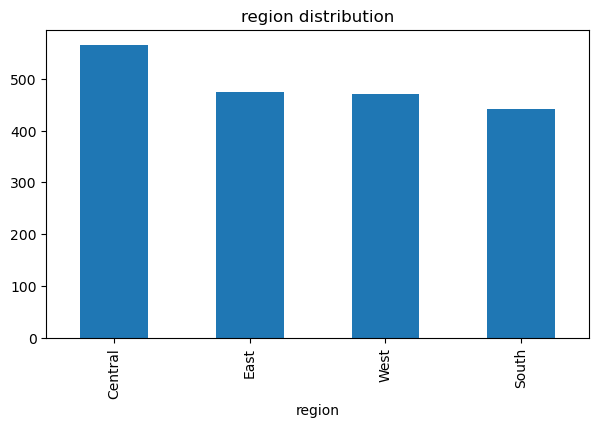

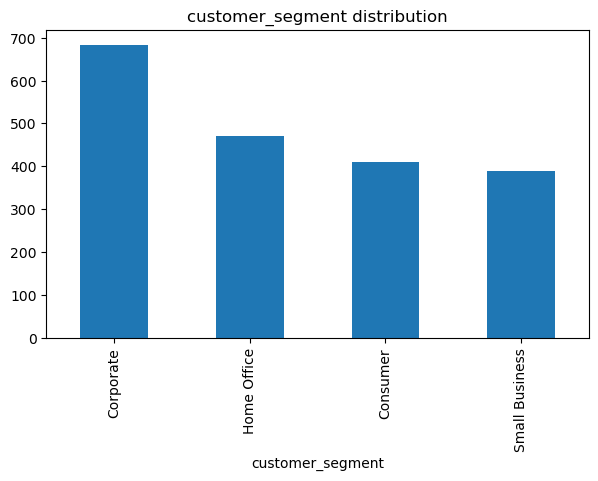

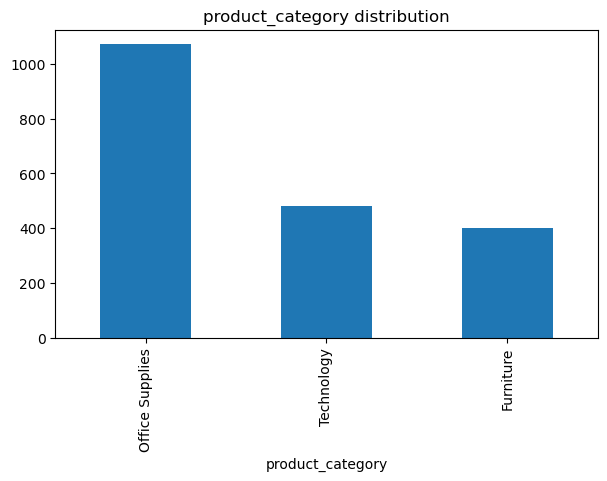

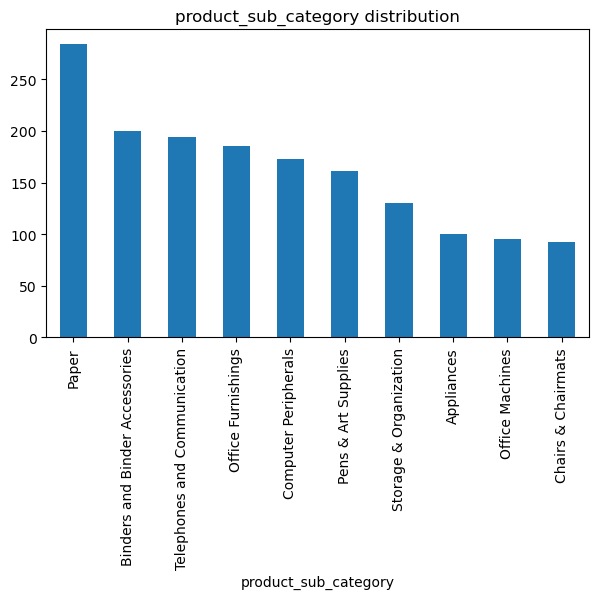

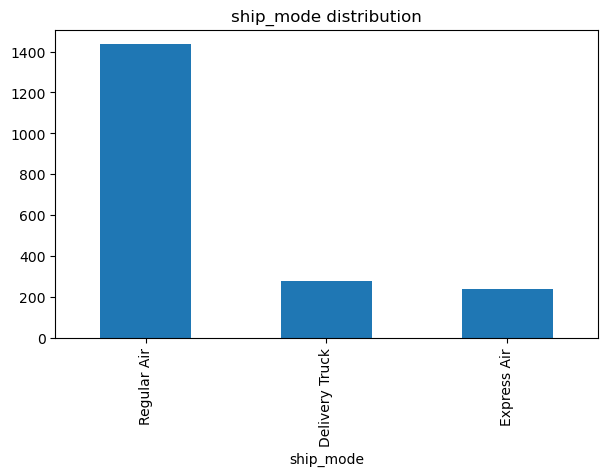

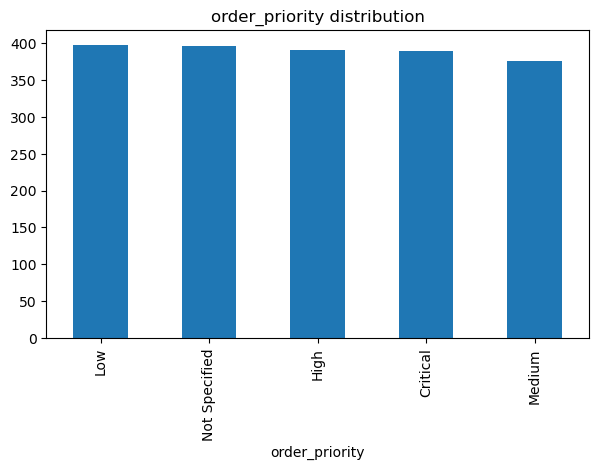

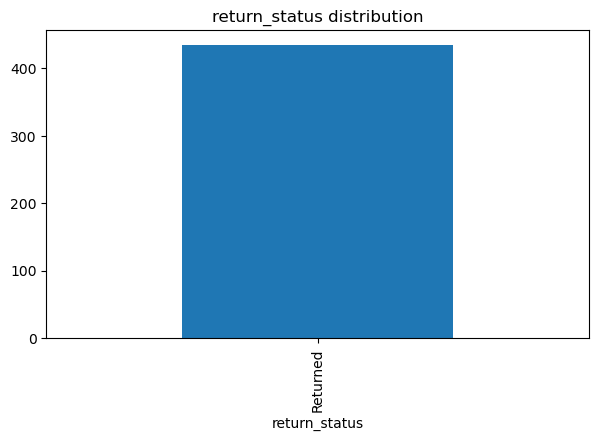

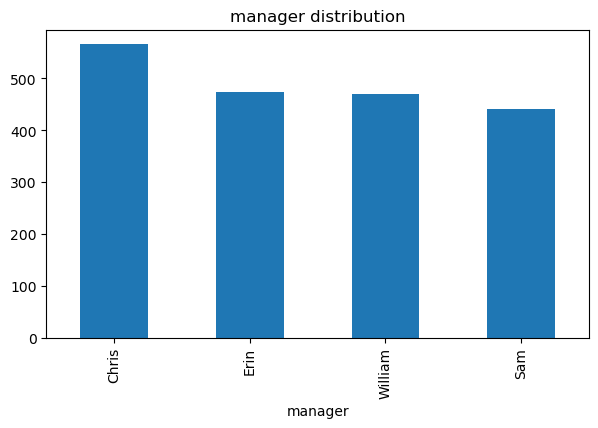

In [53]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"{col} distribution")
    plt.show()

In [54]:
for col in categorical_cols:
    print("\n" + "="*70)
    print(f"KOLONA: {col.upper()}")
    print("="*70)

    vc = df[col].value_counts()

    print("\nTOP 3 kategorija:")
    display(vc.head(3))

    print("\nBOTTOM 3 kategorija:")
    display(vc.tail(3))


KOLONA: REGION

TOP 3 kategorija:


region
Central    566
East       474
West       470
Name: count, dtype: int64


BOTTOM 3 kategorija:


region
East     474
West     470
South    441
Name: count, dtype: int64


KOLONA: CUSTOMER_SEGMENT

TOP 3 kategorija:


customer_segment
Corporate      684
Home Office    470
Consumer       409
Name: count, dtype: int64


BOTTOM 3 kategorija:


customer_segment
Home Office       470
Consumer          409
Small Business    388
Name: count, dtype: int64


KOLONA: PRODUCT_CATEGORY

TOP 3 kategorija:


product_category
Office Supplies    1071
Technology          480
Furniture           400
Name: count, dtype: int64


BOTTOM 3 kategorija:


product_category
Office Supplies    1071
Technology          480
Furniture           400
Name: count, dtype: int64


KOLONA: PRODUCT_SUB_CATEGORY

TOP 3 kategorija:


product_sub_category
Paper                             284
Binders and Binder Accessories    200
Telephones and Communication      194
Name: count, dtype: int64


BOTTOM 3 kategorija:


product_sub_category
Scissors, Rulers and Trimmers    36
Rubber Bands                     34
Copiers and Fax                  18
Name: count, dtype: int64


KOLONA: SHIP_MODE

TOP 3 kategorija:


ship_mode
Regular Air       1436
Delivery Truck     275
Express Air        240
Name: count, dtype: int64


BOTTOM 3 kategorija:


ship_mode
Regular Air       1436
Delivery Truck     275
Express Air        240
Name: count, dtype: int64


KOLONA: ORDER_PRIORITY

TOP 3 kategorija:


order_priority
Low              398
Not Specified    396
High             391
Name: count, dtype: int64


BOTTOM 3 kategorija:


order_priority
High        391
Critical    390
Medium      376
Name: count, dtype: int64


KOLONA: RETURN_STATUS

TOP 3 kategorija:


return_status
Returned    435
Name: count, dtype: int64


BOTTOM 3 kategorija:


return_status
Returned    435
Name: count, dtype: int64


KOLONA: MANAGER

TOP 3 kategorija:


manager
Chris      566
Erin       474
William    470
Name: count, dtype: int64


BOTTOM 3 kategorija:


manager
Erin       474
William    470
Sam        441
Name: count, dtype: int64

In [55]:
df['order_date'].value_counts().sort_index()

order_date
2015-01-01     8
2015-01-02    16
2015-01-03    19
2015-01-04     7
2015-01-05    17
              ..
2015-06-26     4
2015-06-27     4
2015-06-28    12
2015-06-29     8
2015-06-30    16
Name: count, Length: 179, dtype: int64

In [56]:
# Broj porudžbina po datumu
counts = df['order_date'].value_counts()

# TOP 3 datuma (najviše porudžbina)
top_3_dates = counts.head(3)

# LOWEST 3 datuma (najmanje porudžbina)
low_3_dates = counts.tail(3)

print("TOP 3 datuma po broju porudžbina:")
display(top_3_dates)

print("\nBOTTOM 3 datuma po broju porudžbina:")
display(low_3_dates)

TOP 3 datuma po broju porudžbina:


order_date
2015-04-09    28
2015-01-17    22
2015-01-06    22
Name: count, dtype: int64


BOTTOM 3 datuma po broju porudžbina:


order_date
2015-03-09    3
2015-04-16    3
2015-03-03    2
Name: count, dtype: int64

In [57]:
# najveci broj porudzbina se desio 2015-04-septembra (28), a najmanji broj (2) se desio 2015-03-marta

In [58]:
df['row_id'].duplicated().sum()

np.int64(0)

In [59]:
# nema duplikata u row id koloni

In [60]:

#BIVARIJANTA 

In [61]:
pairs_1 = [
    ("sales", "profit"),
    ("unit_price", "profit"),
    ("discount", "profit"),
    ("shipping_cost", "profit"),
    ("discount", "sales")
]

print("KORELACIJA:\n")

for x, y in pairs_1:
    corr = df[[x, y]].corr().iloc[0,1]
    print(f"{x} vs {y} → korelacija = {corr:.3f}")

KORELACIJA:

sales vs profit → korelacija = 0.364
unit_price vs profit → korelacija = -0.182
discount vs profit → korelacija = -0.062
shipping_cost vs profit → korelacija = 0.002
discount vs sales → korelacija = -0.030


In [62]:
# Kada prodaja raste, profit nastoji da raste, ali veza nije jaka. Takodje drugi faktori uticu(Cena itd)
# Skuplji proizvodi su blago povezani sa nizim profitom. Skuplji proizvodi ne garantuju profit, oni imaju veci trosask.
# Popusti su izuzetno blago povezani sa nizim profitom tako sto popusti smanjuju marzu, ali drugi faktori su presudi (cena, kolicina)
# Iuzzetno blaga veza izmedju troskova isporuke i profita, moguce da je visokosofisticirana  porduzbina koja je dovela do profita imala veci trosak isporuke
# popusti su izuzetno blago povezani sa prodajom, negativan predznak moze biti da roba koja se tesko prodaje  pocne da se prodaje sa popustom 

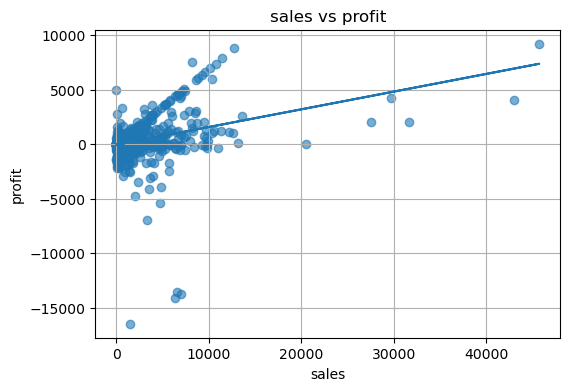

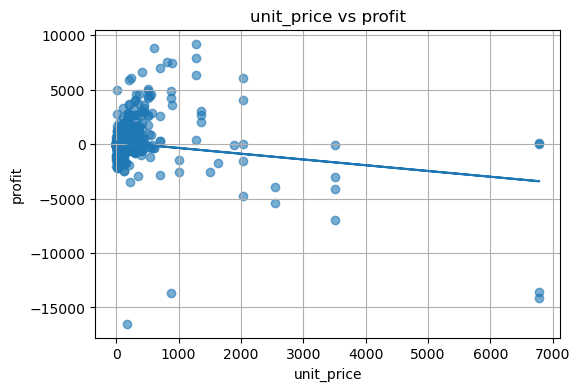

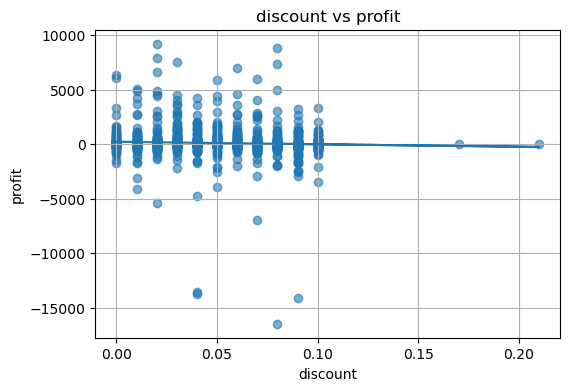

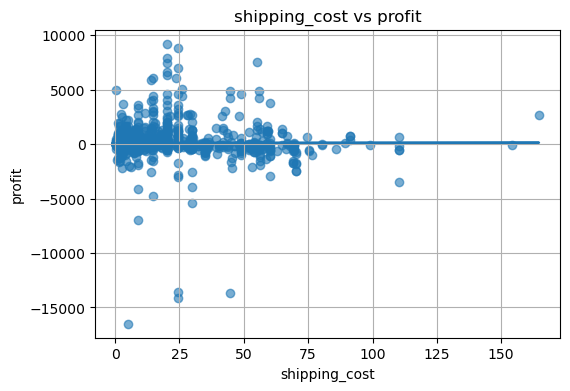

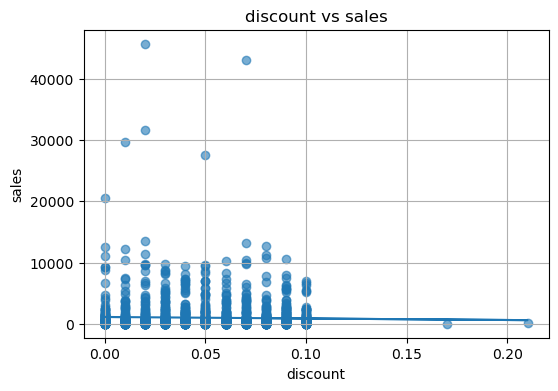

In [63]:
import matplotlib.pyplot as plt
import numpy as np

for x, y in pairs_1:
    plt.figure(figsize=(6,4))
    
    # scatter
    plt.scatter(df[x], df[y], alpha=0.6)
    
    # regresiona linija
    m, b = np.polyfit(df[x], df[y], 1)
    plt.plot(df[x], m*df[x] + b)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.grid(True)
    plt.show()

In [64]:
# prodaja nastoji da pozitivno utice na profit, ali postoje i prodaje sa gubitkom(verovatno povracaj).
# vise cene proizovda nastoje da negativno uticu na profit, jer su veci troskovi.
# slaba je veza izmedju popusta i profita, ali popusti nastoje da smanje profit jer smanjuju marzu.
# slaba veza izmejdu trnasportnih troskova i profita, negativna veza moze biti jer skuplji proizvoda prati skuplji transportni troskovi
# slaba veza izmedju prodaje i popusta, razlog zasto moze biti negativna veza je jer proizovd koji se slabo prodaje pocne da se prodaje sa popustom

In [65]:
import statsmodels.api as sm

print("\nREGRESIJE:\n")

for x, y in pairs_1:
    X = sm.add_constant(df[x])
    model = sm.OLS(df[y], X).fit()

    print("="*50)
    print(f"{x} → {y}")
    print("Beta:", round(model.params[x], 4))
    print("P-vrednost:", round(model.pvalues[x], 4))
    print("R²:", round(model.rsquared, 4))


REGRESIJE:

sales → profit
Beta: 0.1625
P-vrednost: 0.0
R²: 0.1328
unit_price → profit
Beta: -0.528
P-vrednost: 0.0
R²: 0.0331
discount → profit
Beta: -2248.1575
P-vrednost: 0.0063
R²: 0.0038
shipping_cost → profit
Beta: 0.1414
P-vrednost: 0.9241
R²: 0.0
discount → sales
Beta: -2472.2291
P-vrednost: 0.1808
R²: 0.0009


In [66]:
# postoji statitisticki znacajna pozitvna veza izmedju prodaje i profita ali samo 13% promene u profitu moze da se objasni promenom prodaje
# postoji statisticki znacajna negativna veza izmedju cene proizovda i profita, ali samo 3% promene u profitu moze da se objasni promenom cene prozivoda
# postoji statisticki znacajna negativna veza izmdjeu popusta i profita, ali samo 6% promene u profitu moze da se objasni promenom popusta
# ne postoji staitsticki znacajna veza izmdju trnasportnih troskova i profita i 0% promene u profitu  je objasnjeno transprotnim troskovima
# ne postoji statisticki znacajna veza izmedju popusta i prodaje, i fakticki 0% promena u prodaji moze da se objasni popustom


================ region vs return_status ================



return_status,Returned
region,
Central,27.13
East,29.20
South,19.77
West,23.91


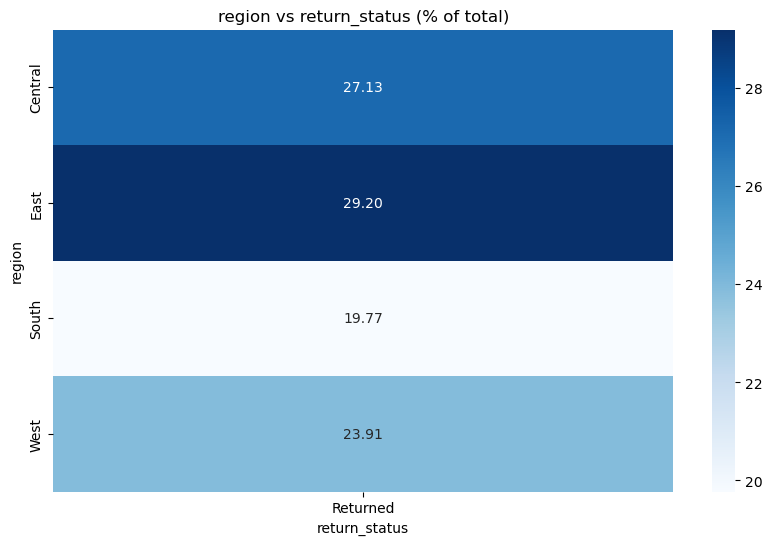


================ manager vs region ================



region,Central,East,South,West
manager,,,,
Chris,29.01,0.0,0.0,0.00
Erin,0.00,24.3,0.0,0.00
Sam,0.00,0.0,22.6,0.00
William,0.00,0.0,0.0,24.09


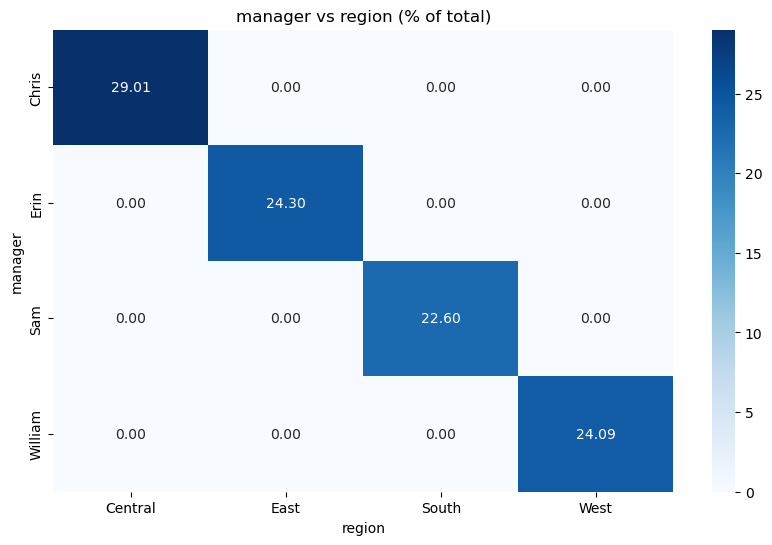


================ ship_mode vs order_priority ================



order_priority,Critical,High,Low,Medium,Not Specified
ship_mode,,,,,
Delivery Truck,56,57,56,54,52
Express Air,52,46,39,47,56
Regular Air,282,288,303,275,288


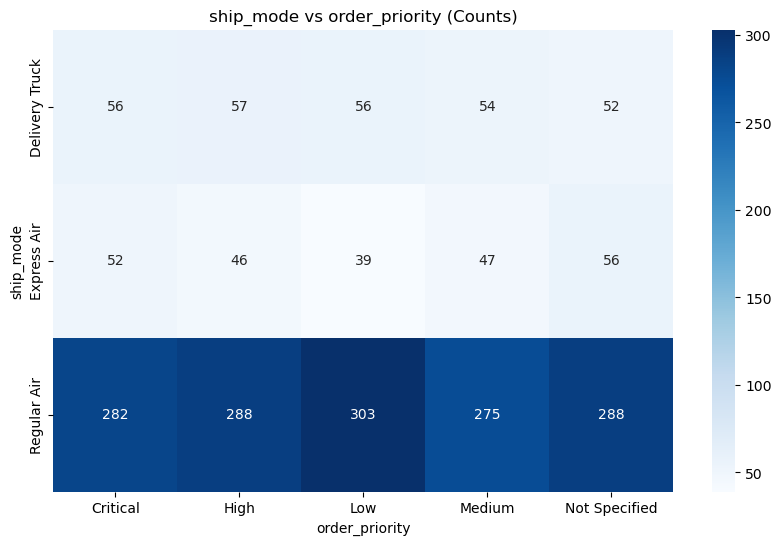

In [67]:
pairs_2 = [
    ("region", "return_status"),
    ("manager", "region"),
    ("ship_mode", "order_priority")
]

for i, (a, b) in enumerate(pairs_2):
    print(f"\n================ {a} vs {b} ================\n")

    if i < 2:
        # ✅ Prva dva – procenti od ukupnog broja
        ct = pd.crosstab(df[a], df[b], normalize=True) * 100
        display(ct.round(2))

        plt.figure(figsize=(10,6))
        sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues")
        plt.title(f"{a} vs {b} (% of total)")
    else:
        # ✅ Treća – apsolutni brojevi
        ct = pd.crosstab(df[a], df[b])
        display(ct)

        plt.figure(figsize=(10,6))
        sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{a} vs {b} (Counts)")

    plt.xlabel(b)
    plt.ylabel(a)
    plt.show()


In [68]:
# Najveci broj porduzbina je vracen u istocnom regionu, a najmanji broj u juznom
# Chris je odgovoran za najveci broj porudzbina, a Sam za najmanji broj porduzbina
# Najveci broj porduzbina su transportovani klasicnim avionskim transportom sa niskim prioritetom posiljke, dok najmanji broj porudzbina je bio transportovan expres avionom takodje niskog prioriteta isporuke

In [69]:
pairs_3 = [
    ("region", "profit"),
    ("manager", "profit"),
    ("customer_segment", "profit"),
    ("ship_mode", "shipping_cost"),
    ("order_priority", "profit")
]

In [70]:
for cat, num in pairs_3:
    print("\n" + "="*70)
    print(f"{cat.upper()}  vs  {num.upper()}")
    print("="*70)

    summary = (
        df.groupby(cat)[num]
          .agg(["mean", "sum"])
          .sort_values("mean", ascending=False)
    )
    
    display(summary)


REGION  vs  PROFIT


,mean,sum
region,,
East,179.939684,85291.41
West,161.371894,75844.79
Central,136.688145,77365.49
South,-32.735465,-14436.34



MANAGER  vs  PROFIT


,mean,sum
manager,,
Erin,179.939684,85291.41
William,161.371894,75844.79
Chris,136.688145,77365.49
Sam,-32.735465,-14436.34



CUSTOMER_SEGMENT  vs  PROFIT


,mean,sum
customer_segment,,
Small Business,168.311753,65304.96
Consumer,121.962592,49882.70
Home Office,115.815894,54433.47
Corporate,79.596813,54444.22



SHIP_MODE  vs  SHIPPING_COST


,mean,sum
ship_mode,,
Delivery Truck,44.137455,12137.80
Express Air,9.131083,2191.46
Regular Air,7.645592,10979.07



ORDER_PRIORITY  vs  PROFIT


,mean,sum
order_priority,,
Not Specified,177.995833,70486.35
Medium,115.346170,43370.16
Critical,98.188436,38293.49
High,93.351509,36500.44
Low,88.982186,35414.91


In [71]:
# najveci profit od porudzbina je u istocnom delu, a gubitak je u jucnom delu
# najveci profit od porudzbina je pod nadzorom Erina, a gubitak pod Chrisom
# najveci profit od porudzbina je od malih preduzeca, a najmanji od korporacija
# najveci transportni trosak imaju kamioni, a izmejdu aviona, expres avionski transport ima  veci prosecni trosak ali manji ukupni trosak jer se redje koristi.
# najvec profit po porudzbini nema odredjen prioritet isporuke, a najmanji profit po porduzbini ima nizak prioritet isporuke.

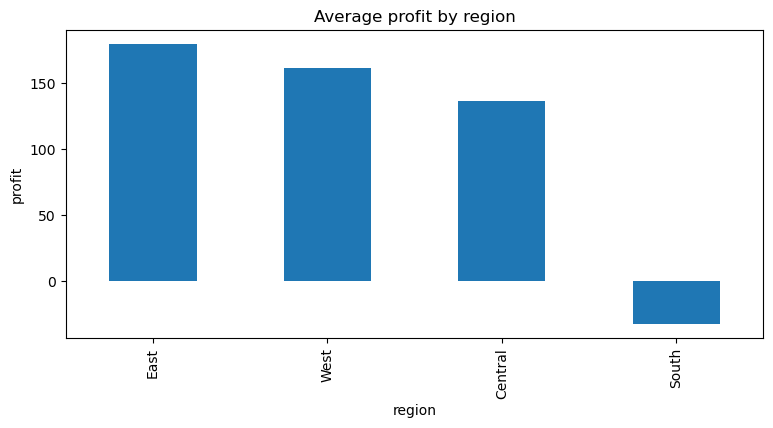

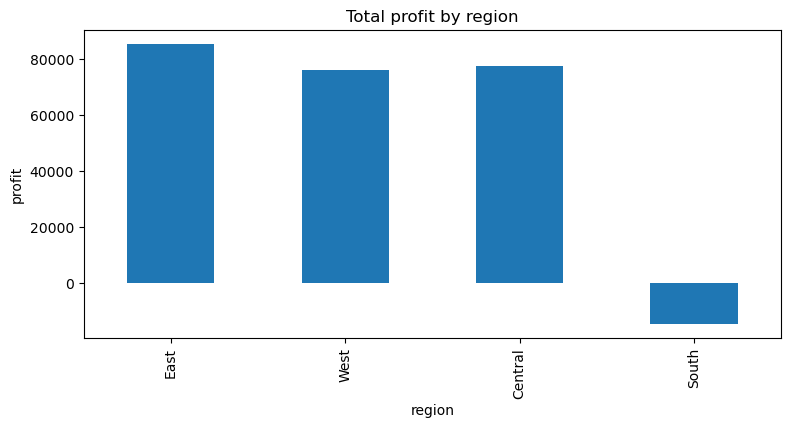

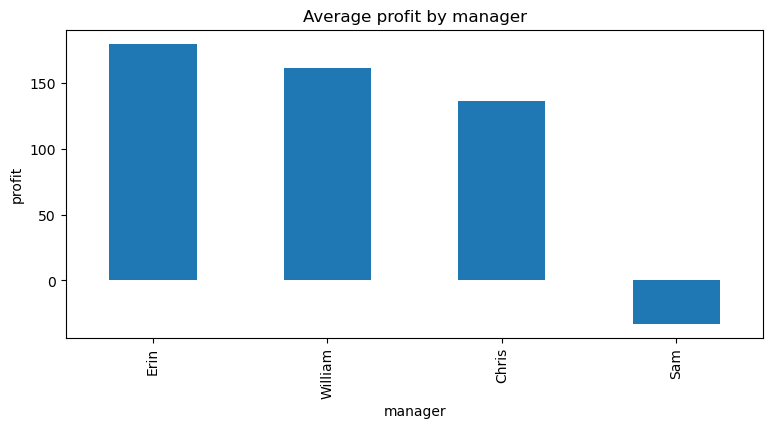

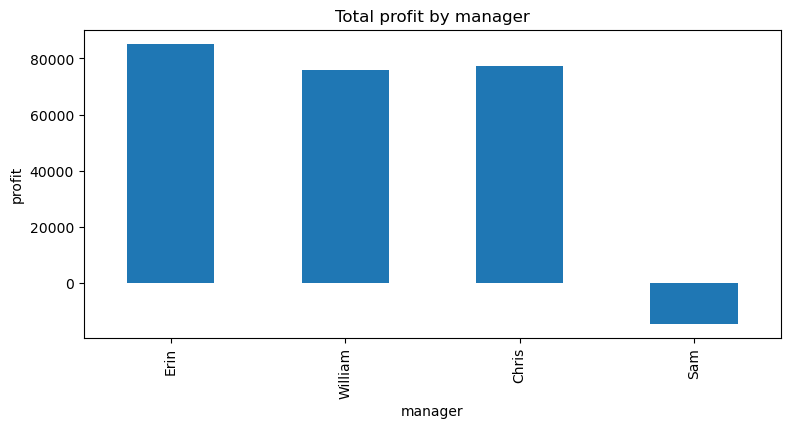

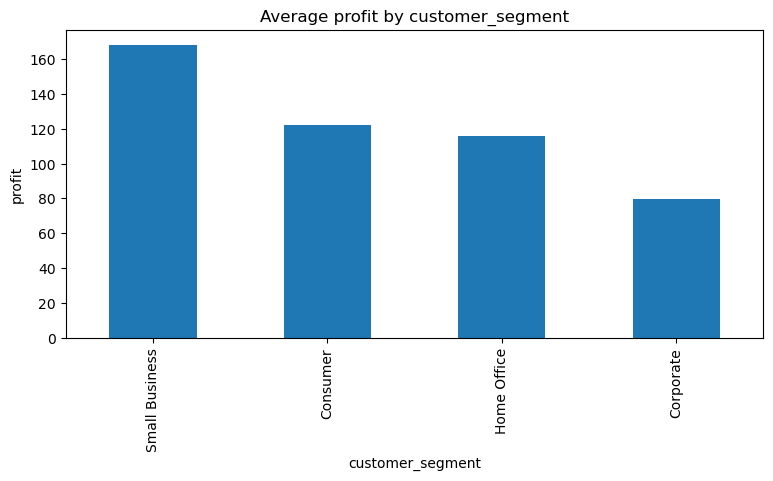

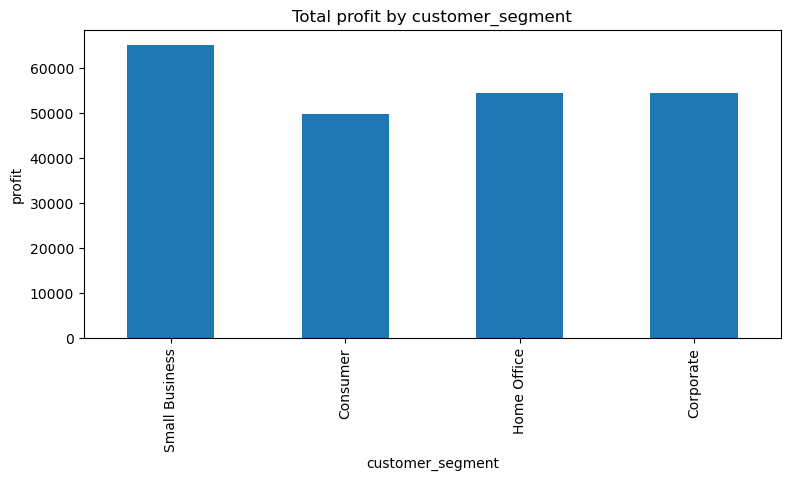

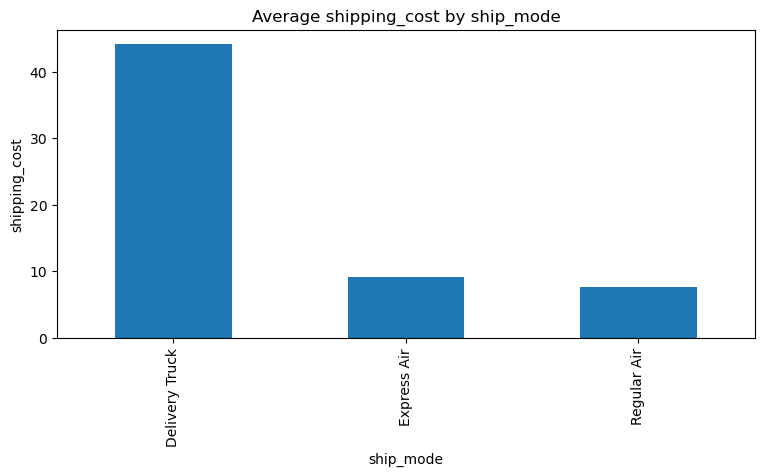

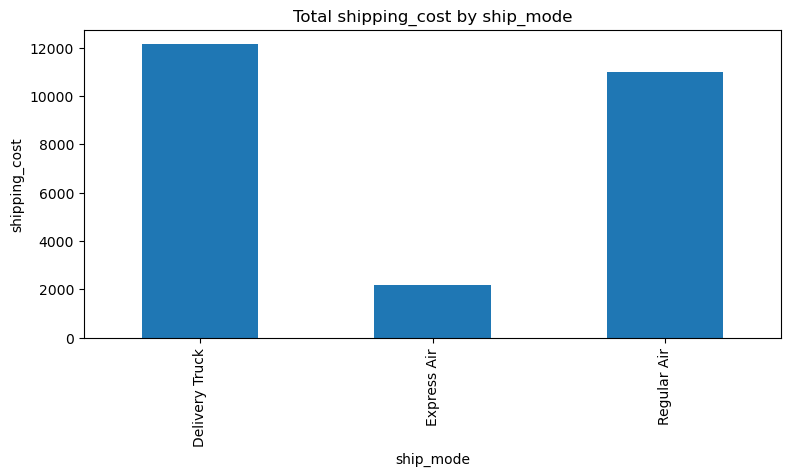

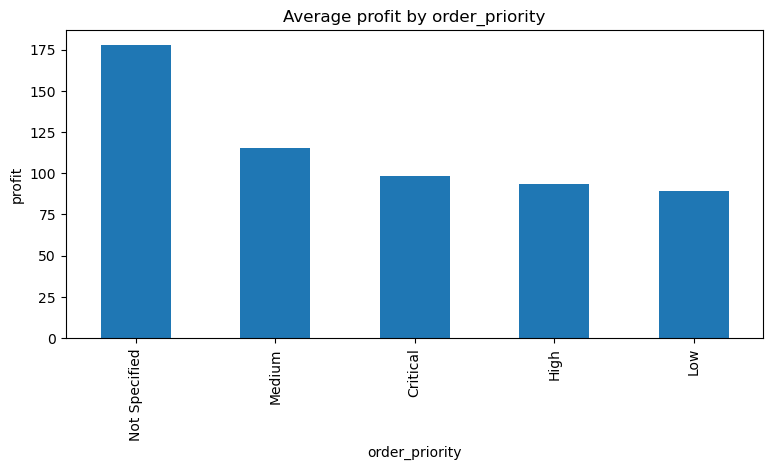

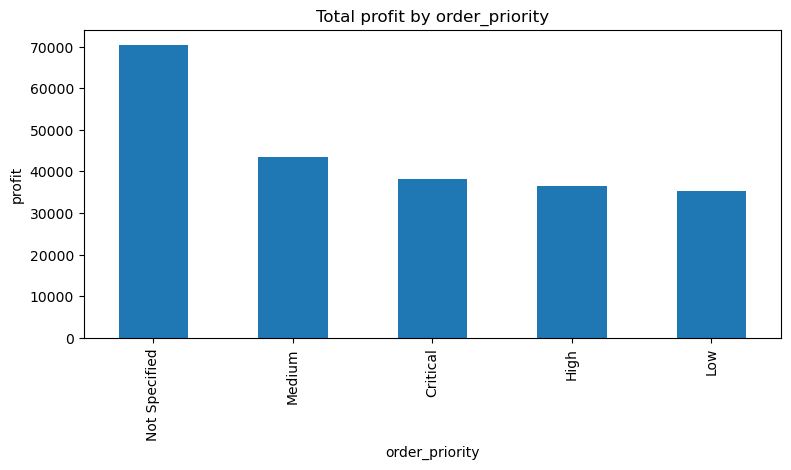

In [72]:
import matplotlib.pyplot as plt

for cat, num in pairs_3:
    summary = (
        df.groupby(cat)[num]
          .agg(["mean", "sum"])
          .sort_values("mean", ascending=False)
    )

    # Average
    summary["mean"].plot(kind="bar", figsize=(9,4), title=f"Average {num} by {cat}")
    plt.ylabel(num)
    plt.show()

    # Total
    summary["sum"].plot(kind="bar", figsize=(9,4), title=f"Total {num} by {cat}")
    plt.ylabel(num)
    plt.show()

In [73]:
import pandas as pd
import plotly.express as px

df["order_date"] = pd.to_datetime(df["order_date"])
df = df.sort_values("order_date")

pairs_time = [
    ("sales", "Sales"),
    ("profit", "Profit")
]

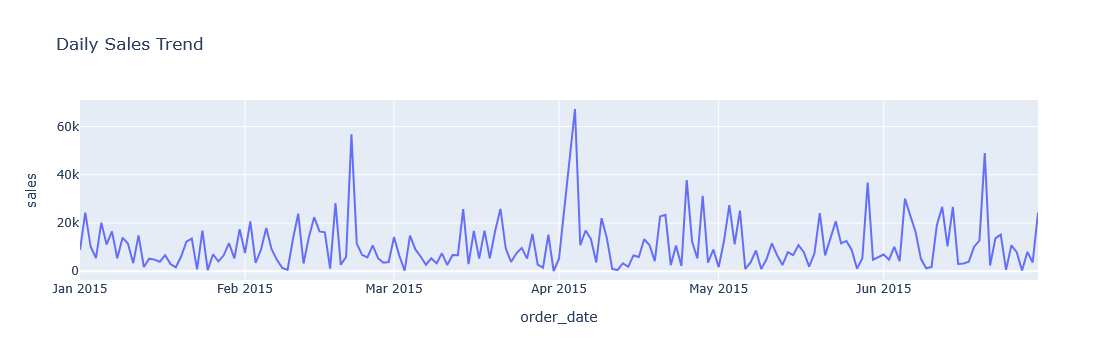

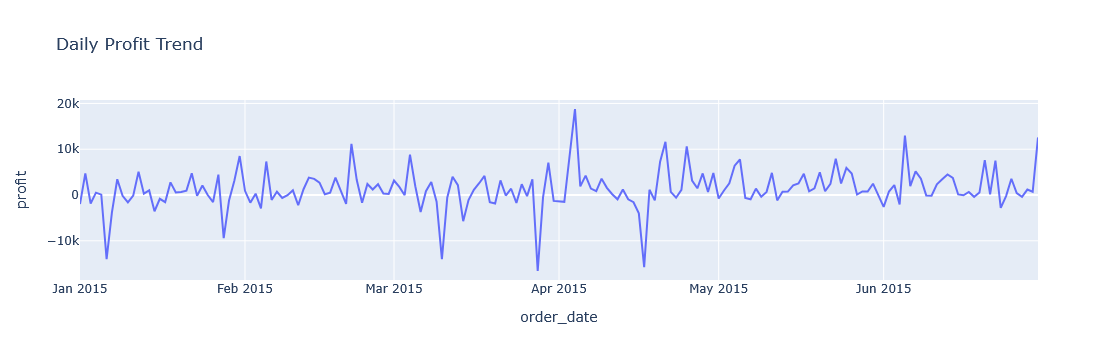

In [74]:
daily = df.groupby("order_date")[["sales", "profit"]].sum().reset_index()

for col, name in pairs_time:
    fig = px.line(
        daily, 
        x="order_date", 
        y=col, 
        title=f"Daily {name} Trend"
    )
    fig.show()

In [75]:
#Prodaja je volatilna, sa pikovima 21 februara i 4 aprila 2015 godine.
# Profit je volatilan sa pikom 4 aprila, i najvecim gubicima 10 marta, 28 marta i 17 aprila 2015 godine.

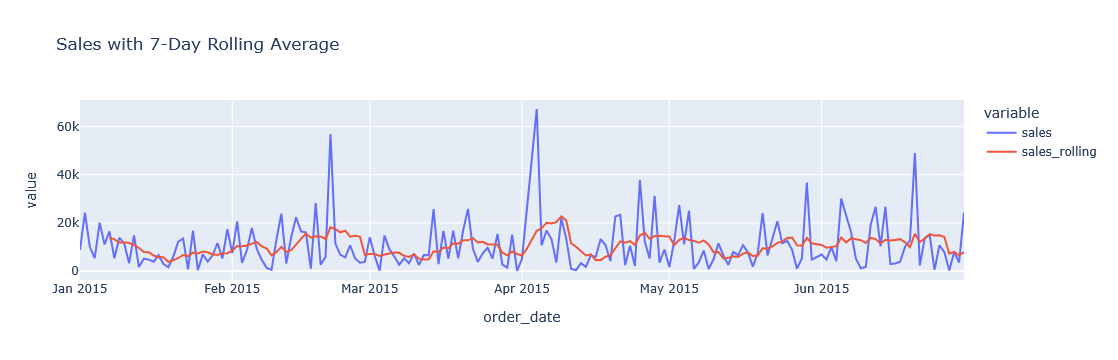

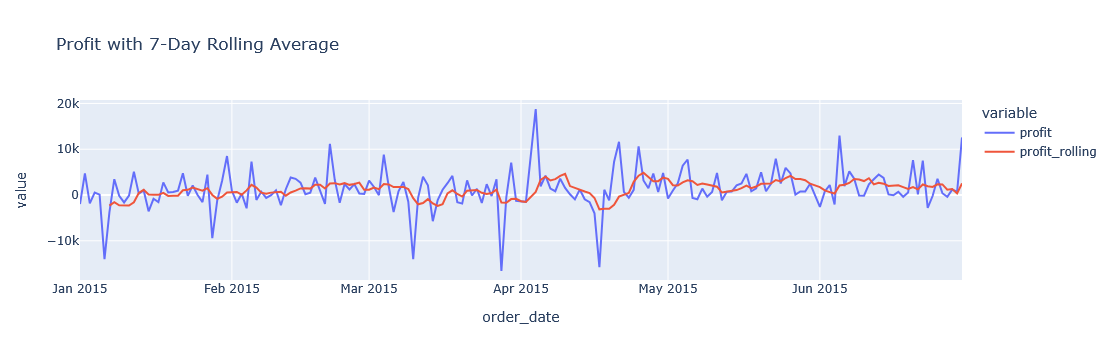

In [76]:
rolling = daily.copy()

for col, name in pairs_time:
    rolling[f"{col}_rolling"] = rolling[col].rolling(window=7).mean()

    fig = px.line(
        rolling,
        x="order_date",
        y=[col, f"{col}_rolling"],
        title=f"{name} with 7-Day Rolling Average"
    )
    fig.show()

In [77]:
# prosecna sedmo-dnevna vrednost prodaje, iako ima povremen skokove u februaru i aprilu nije suvise volatilna
# prosecni sedmo-dnevni profit, pokazuje volatilnost, posebno izmdju 10 i 17 aprila, kada od profita prelazi u gubitak, nakon cega pri kraju meseca ponovo postaje profit.

In [78]:
monthly = df.copy()
monthly["month"] = monthly["order_date"].dt.to_period("M").astype(str)

monthly_summary = (
    monthly
    .groupby("month")[["sales", "profit"]]
    .agg(["sum", "mean"])
)

display(monthly_summary)

sales                 profit            
               sum         mean       sum        mean
month                                                
2015-01  274766.92   742.613297   1043.61    2.820568
2015-02  326101.47  1038.539713  35944.66  114.473439
2015-03  271696.67   828.343506    103.16    0.314512
2015-04  386231.30  1206.972812  53134.21  166.044406
2015-05  306572.07   979.463482  67002.74  214.066262
2015-06  355368.80  1161.335948  66836.97  218.421471

In [79]:
# najmanja prodaja i najmanji profit, su se desile u martu 2015. Najveca prodaja se desila u aprilu 2015, a najveci profit u Junu 2015.

In [80]:
#MULTIVARIJATNA

In [81]:
import statsmodels.api as sm

features = [
    "sales",
    "discount",
    "shipping_cost",
    "unit_price",
    "quantity_ordered_new"
]

segments = ["Consumer", "Corporate", "Home Office"]

results = []

for seg in segments:
    temp = df[df["customer_segment"] == seg].dropna(subset=features + ["profit"])
    
    X = temp[features]
    y = temp["profit"]
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    for var in features:
        results.append({
            "customer segment": seg,
            "variable": var,
            "beta": round(model.params[var], 4),
            "p_value": round(model.pvalues[var], 4),
            "r_squared": round(model.rsquared, 4)
        })

results_df = pd.DataFrame(results)
results_df

,customer segment,variable,beta,p_value,r_squared
0,Consumer,sales,0.2435,0.0000,0.4189
1,Consumer,discount,-3098.9221,0.0178,0.4189
2,Consumer,shipping_cost,1.4086,0.5880,0.4189
3,Consumer,unit_price,-1.3811,0.0000,0.4189
4,Consumer,quantity_ordered_new,-7.5655,0.0213,0.4189
5,Corporate,sales,0.2797,0.0000,0.2237
6,Corporate,discount,-865.4838,0.4984,0.2237
7,Corporate,shipping_cost,-9.4995,0.0002,0.2237
8,Corporate,unit_price,-1.2000,0.0000,0.2237
9,Corporate,quantity_ordered_new,-5.6152,0.0983,0.2237


In [82]:
# Kod Consumer segmenta, profit je pozitivno povezan sa prodajom, dok viša cena, veće količine i popusti imaju negativan efekat. Ovo ukazuje da se skuplji proizvodi u ovom segemntu cesto prodaju uz vece popuste i dodatne troskove, sto smanjuje marzu.Rast prodaje se podstice kroz volumen a ne kroz profitabilne cene
# Kod Corporate segmenta , profit zavisi pre svega od obima prodaje (pozitivan efekat), dok transportni troškovi i cena imaju značajan negativan uticaj. Ovo sugeriše da su logistički troškovi i cenovna struktura ključni faktori profitabilnosti u ovom segmentu
# Kod Home Office segmenta, pored prodaje (pozitivan efekat), znacaj negativan uticaj imaju kolicina, transportni troskovi i cena, sto ukazuje da vece porudzbine u ovom segmentu se cesto odnose na skuplje proizvode sa visim logistickim troskovima, sto dovodi do disproporcionalnog rasta troskova u odnosu na prihod i negativno utice na profitabilnost

In [83]:
customer_df = (
    df.groupby(["customer_id", "customer_name"])
      .agg(
          total_sales=("sales", "sum"),
          total_profit=("profit", "sum"),
          num_orders=("order_pk", "nunique"),
          avg_discount=("discount", "mean"),
          avg_shipping_cost=("shipping_cost", "mean")
      )
      .reset_index()
)

customer_df

,customer_id,customer_name,total_sales,total_profit,num_orders,avg_discount,avg_shipping_cost
0,3,Bonnie Potter,13.01,4.56,1,0.010000,0.930000
1,5,Ronnie Proctor,6362.85,4390.37,1,0.020000,26.000000
2,11,Marcus Dunlap,211.15,-53.81,1,0.060000,7.290000
3,14,Gwendolyn F Tyson,1214.93,741.70,1,0.067500,7.032500
4,15,Timothy Reese,413.00,202.06,2,0.005000,5.825000
...,...,...,...,...,...,...,...
1125,3393,Irene Murphy,790.56,371.39,2,0.080000,5.095000
1126,3397,Andrea Shaw,9603.24,6106.73,2,0.036667,10.826667
1127,3399,Marvin Reid,59.98,-41.87,1,0.080000,5.810000
1128,3400,Florence Gold,135.78,-24.71,1,0.100000,4.930000


In [84]:
features = [
    "total_sales",
    "total_profit",
    "num_orders",
    "avg_discount",
    "avg_shipping_cost"
]

X = customer_df[features].copy()

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

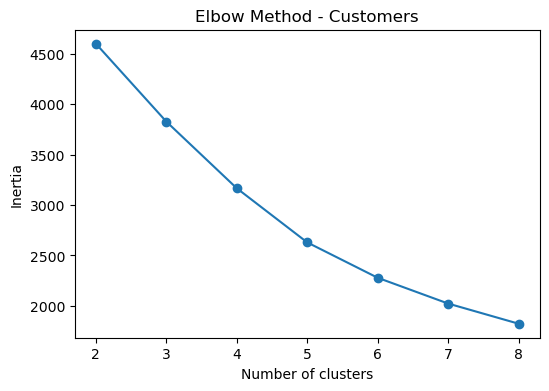

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,9), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method - Customers")
plt.show()

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_df["customer_cluster"] = kmeans.fit_predict(X_scaled)

In [88]:
cluster_profile = customer_df.groupby("customer_cluster")[features].mean().round(2)
cluster_profile

,total_sales,total_profit,num_orders,avg_discount,avg_shipping_cost
customer_cluster,,,,,
0,718.73,87.77,1.19,0.05,7.51
1,8118.78,2214.51,2.44,0.05,15.02
2,2523.68,-643.26,1.19,0.05,43.13


In [89]:
# klaster 0 karakterise solidna prodaja, solidan profit i prosecna porduzbina. Klaster 0 su kupci koji cine vecinu baze kupaca, ali sa nizom profitabilnoscu po kupcu.


# klaster 1  karakterise izuzetno velika prodaja, visoki profit i veci broj porduzbina. Klaster 1 su kupci koji najvise doprinose poslovnom rezultatu, fokus bi trebao biti na njihovom zadrzavanju kroz personalizovane ponude, kvalitetnu uslugu i loyalty programe.
# klaster 2 karakterise velika prodaja, ali negativan profit uz prosecnu broj porduzbina. Klaster 2 su finnsijski rizicki kupci i zahteva posebnu paznju.


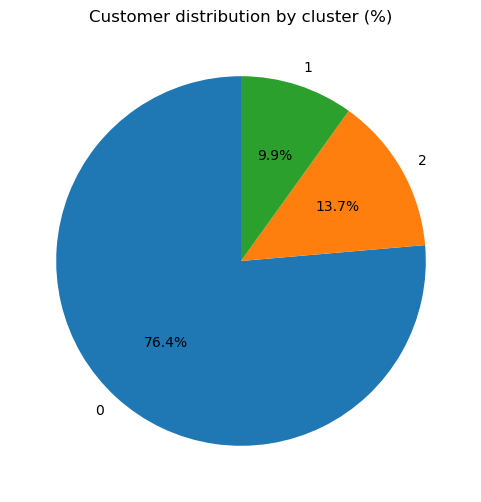

In [90]:
import matplotlib.pyplot as plt

# procenti klastera
cluster_pct = customer_df["customer_cluster"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(cluster_pct, 
        labels=cluster_pct.index, 
        autopct='%1.1f%%', 
        startangle=90)

plt.title("Customer distribution by cluster (%)")
plt.show()

In [91]:
# kupci koji pokrivaju 76.4% porduzbina su iz klastera 0
# kupci koji pokrivaju 9.9% porduzbina su iz klastera 1
# kupci koji pokrivaju 13.7% porduzbina su iz klastera 2

In [92]:
cluster_profit = customer_df.groupby("customer_cluster")["total_profit"].sum()
cluster_profit

customer_cluster
0     75744.96
1    248025.29
2    -99704.90
Name: total_profit, dtype: float64

In [93]:
# kupci iz klastera 1 najvise doprinose profitabilnosti
# kupci iz klastera 0 imaju solidan doprinos profitabilnosti
# kupci iz klastera 2 doprinose da troskovi premasuju profit, sto dovodi do gubitka.

In [94]:
import numpy as np
from scipy import stats

df_test = df[['region', 'sales']].dropna()

shift = abs(df_test['sales'].min()) + 1
df_test['log_sales'] = np.log(df_test['sales'] + shift)

# Shapiro test po regionima
for r in df_test['region'].unique():
  stat, p = stats.shapiro(df_test[df_test['region']==r]['log_sales'])
  print(r, "p-value:", round(p,4))

West p-value: 0.0
South p-value: 0.0005
East p-value: 0.0
Central p-value: 0.0


In [95]:

shift = abs(df_test['sales'].min()) + 1


df_test['sqrt_sales'] = np.sqrt(df_test['sales'] + shift)

# Shapiro test po regionima
for r in df_test['region'].unique():
 stat, p = stats.shapiro(df_test[df_test['region'] == r]['sqrt_sales'])
 print(r, "p-value:", round(p, 5))

West p-value: 0.0
South p-value: 0.0
East p-value: 0.0
Central p-value: 0.0


In [96]:
from scipy.stats import boxcox


shift = abs(df_test['sales'].min()) + 1


df_test['boxcox_sales'], lambda_bc = boxcox(df_test['sales'] + shift)


# Shapiro test po regionima
for r in df_test['region'].unique():
 stat, p = stats.shapiro(df_test[df_test['region'] == r]['boxcox_sales'])
 print(r, "p-value:", round(p, 5))

West p-value: 0.00057
South p-value: 0.00112
East p-value: 0.00053
Central p-value: 9e-05


In [97]:
#Kruskal-Wallis test

groups = [
df_test[df_test['region']=='Central']['sales'],
df_test[df_test['region']=='East']['sales'],
df_test[df_test['region']=='South']['sales'],
df_test[df_test['region']=='West']['sales']
]

h_stat, p_value = stats.kruskal(*groups)

print("Kruskal H-statistic:", h_stat)
print("p-value:", p_value)


Kruskal H-statistic: 2.7744741754380082
p-value: 0.42771917825229044


<Figure size 640x480 with 0 Axes>

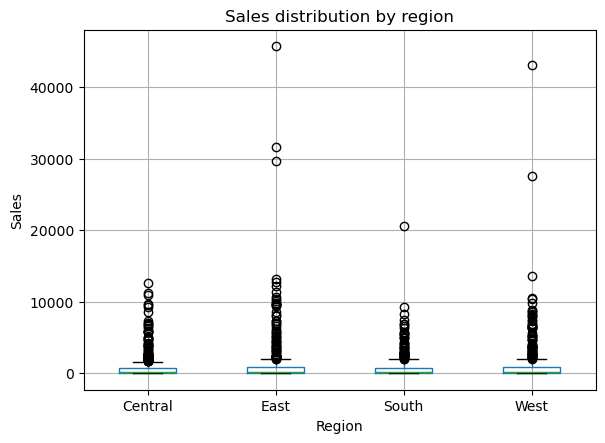

In [98]:

import matplotlib.pyplot as plt

plt.figure()
df_test.boxplot(column='sales', by='region')
plt.title("Sales distribution by region")
plt.suptitle("") # uklanja automatski naslov
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

In [99]:
summary = df_test.groupby("region")["sales"].agg(["mean", "median", "std"])
print(summary)

                mean   median          std
region                                    
Central   792.022438  188.585  1610.022846
East     1249.306941  228.400  3524.723847
South     801.597438  220.520  1639.501414
West     1120.801213  193.140  2984.273444


In [100]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [101]:
import bar_chart_race as bcr

sales_daily = df.groupby([df['order_date'].dt.date, 'state_or_province'])['sales'].sum().reset_index()

sales_pivot = sales_daily.pivot(index='order_date', columns='state_or_province', values='sales').fillna(0)

sales_cum = sales_pivot.cumsum()

bcr.bar_chart_race(
df=sales_cum,
filename="top10_states_sales.gif",
orientation='h',
sort='desc',
n_bars=10,
title='Top 10 States by Cumulative Sales'   
)

C:\Users\stefan.radovic\AppData\Local\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\stefan.radovic\AppData\Local\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\stefan.radovic\AppData\Local\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\stefan.radovic\AppData\Local\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

MovieWriter imagemagick unavailable; using Pillow instead

In [ ]:
df['week'] = df['order_date'].dt.to_period('W').astype(str)

profit_week = df.groupby(['week', 'order_priority'])['profit'].sum().reset_index()

profit_pivot = profit_week.pivot(index='week', columns='order_priority', values='profit').fillna(0)

profit_cum = profit_pivot.cumsum()

bcr.bar_chart_race(
df=profit_cum,
filename="profit_by_priority.gif",
orientation='h',
sort='desc',
n_bars=5,
title='Cumulative Profit by Order Priority (Weekly)'  
)


In [ ]:
# ZAKLJUCAK

# Sprovedena analiza je pokazala da poslovni podaci imaju izrazenu asimetricnu raspodelu, sa velikim brojem maanjih porudzbina i manjim brojem ekstremno vleikih porudzbina koje nose disproporcionalno veliki uticaj na ukupne rezultate.
# Vecina prodaja i profita koncentrisana je oko nizih vrednosti, dok mali broj porduzbina generise i najvece profite i najvece gubitke, sto ukazuje na povecan poslovni rizik.

# Ispitivanje odnosa izmedju kljucnih varijabli pokazalo je da profit ne zavisi od jednog faktora, vec od njihove kombinacije. Veze izmedju prodaje, popusta, troskova isporuke i profita uglavnom su slabe do umerene, pri cemu je posebno uoceno da veci popusti nisu povezani sa profitom.
# Segmmentacija kupaca putem klaster analize pokazala je da posotje 3 grupe kupaca. 1 klaster su kupci koji cine vecinsku bazu oko 80%, sa umerenim iznosima prodaje i brojem porudzbina i stbailnim profitom. 2 klaster cine kupci sa visokim iznosima prodaje i profita sa vecim brojem porduzbina, onis su nosioci profitabilnosti. 3 klaster su kupci koje pored velikog boja prodaje i umerenog broja porudzbina karakterise i ostvareni gubitak, oni predstalvjaju finansijski rizicne kupce.

# Vremenska analiza je pokazala da poslovni rezultati znacajno variraju tokom godine, sa jasnim periodima pojacane aktivnosti i povecane volatilnosti. Trendovi ukazuju da se ekstremne vrednosti profita i prodaje pojalvjuju u ogrnicenim vremenskim intervalima, sto dodatno potvrdjuje da mali broj perioda i porudzbina ima nesrazmerno veliki uticaj na ukuone rezultate. 
# Na mesecnom nivou, april 2015 se izdvaja kao najprofitabilniji mesec i mesec sa najveicm obimom prodaje, dok je martt 2015 mesec najslabije profitabilnosti i najmanje prodaje. Sa druge strane, dnevni podaci pokazuju pik za profit i prodaju 4 aprila 2015, a najveci gubitak 28 marta 2015.